In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def step_signal (low, high, s_low=0.2, s_high=0.2, larg_high_i=20, larg_high_f=100, larg_low_i=20, larg_low_f=100, prob_positivo=0.5, n=100):
       
    distrib = np.random.binomial(1,prob_positivo,n)
    signal = np.concatenate([np.random.uniform(high-s_high,high+s_high,np.random.randint(larg_high_i, larg_high_f)) if x == 1 else np.random.uniform(low-s_low,low+s_low,np.random.randint(larg_low_i, larg_low_f)) for x in distrib])
    return signal

In [7]:
def alarm_generate(x, limit, type_var, delay_time, dead_band):
    
    t_delay = 0
    t_dead = 0
    log_alarm = np.arange(len(x))
    
    if type_var == 'high':
        for i in np.arange(len(x)):
            if x[i] > limit:
                t_dead = 0
                t_delay = t_delay + 3/len(x)
                if t_delay >= delay_time:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(x)
                    if t_dead >= dead_band:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0
    else:
        for i in np.arange(len(x)):
            if x[i] < limit:
                t_dead = 0
                t_delay = t_delay + 3/len(x)
                if t_delay >= delay_time:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(x)
                    if t_dead >= dead_band:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0

    return log_alarm

In [8]:
x = []
for i in np.arange(10):
    x.append(step_signal(3,7))

In [13]:
for i in np.arange(10):
    if len(x[0]) > len(x[i]):
        if x[i][-1] >= 2.8 and x[i][-1] <= 3.2:
            x[i] = np.concatenate((x[i],np.random.uniform(3-0.2,3+0.2,len(x[0])-len(x[i]))))
        elif x[i][-1] >= 6.7 and x[i][-1] <= 7.3:
            x[i] = np.concatenate((x[i],np.random.uniform(7-0.3,7+0.3,len(x[0])-len(x[i]))))
    else:
        delete = np.nonzero(x[i][len(x[0]):])
        x[i] = np.delete(x[i],delete)
    
    
limit = 5 
type_ = 'high' 
delay_time = 100*3/len(x[0])
dead_band = 70*3/len(x[0])
t_delay = 0
df = pd.DataFrame()
for i in np.arange(10):
    df['x'+str(i)] = x[i]

In [14]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,3.176067,6.975747,2.853348,3.041478,6.865212,7.187272,3.139641,2.971423,3.139801,7.001284
1,2.894913,6.976471,2.992514,2.952938,7.166392,6.814398,2.839412,3.126398,3.084943,6.862950
2,3.016641,6.810455,3.155697,2.928741,6.947891,7.133111,3.011011,2.890588,2.935514,6.839528
3,2.996048,6.896589,2.970968,3.037317,7.177943,7.115713,2.973208,3.123626,2.880781,7.027077
4,2.804670,6.994918,3.064887,2.801289,6.942383,7.083910,3.194796,2.846411,3.084371,7.179716


In [25]:
log = []
for i in np.arange(10):
    log.append(alarm_generate(x[i], limit, 'high', delay_time, dead_band))

In [28]:
df_log = pd.DataFrame()
for i in np.arange(10):
    df_log['Var_'+str(i)] = log[i]

In [29]:
df_log.head()

,Var_0,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


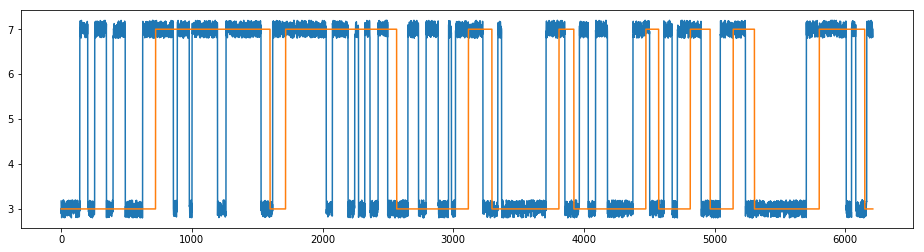

In [35]:
plt.figure(figsize=(16,4))
plt.plot(df['x0'])
plt.plot(df_log['Var_0']*4+3)


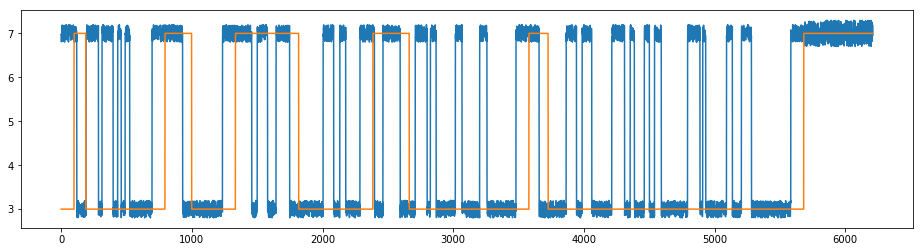

In [36]:
plt.figure(figsize=(16,4))
plt.plot(df['x1'])
plt.plot(df_log['Var_1']*4+3)